### 1 Решите линейную систему:
![](Screenshot_7_2_1.png)

In [3]:
import numpy as np
a = np.array([[1,2,3],[4,0,6],[7,8,9]])
b = np.array([12,2,1])

#есть ли решение
print(np.linalg.det(a))

#решение
x = np.linalg.solve(a,b)
print(x)

#проверим
print(np.dot(a,x))

59.999999999999986
[-9.2         0.9         6.46666667]
[12.  2.  1.]


### 2 Найдите псевдорешение:
![](Screenshot_7_2_2.png)

In [8]:
a = np.array([[1,2,-1],[3,-4,0],[8,-5,2],[2,0,-5],[11,4,-7]])
b = np.array([1,7,12,7,15])

x, res, rank, s = np.linalg.lstsq(a,b, rcond=None)
print(x)

#проверим
print(np.dot(a,x))

[ 1.13919353 -0.90498444 -0.9009803 ]
[ 0.23020495  7.03751834 11.83650981  6.78328855 15.21805313]


### 3 Сколько решений имеет линейная система. Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 
![](Screenshot_7_2_3.png)<br>

In [12]:
a = np.array([[1,2,3], [4,5,6],[7,8,9]])
b = np.array([[12,2,1]])

#посчитаем определитель
print(np.linalg.det(a))

#посчитаем ранг матрицы и ранг расширенной матрицы
c = np.concatenate((a,b.T), axis=1)
print(np.linalg.matrix_rank(a), np.linalg.matrix_rank(c))

-9.51619735392994e-16
2 3


**Ответ**<br>
Исходная система решений не имеет.


**Поменяем вектор правой части**

In [13]:
#предположим, что решение [0,0,0], тогда вектор правой части:
b = np.array([[0,0,0]])
c = np.concatenate((a,b.T), axis=1)
print(np.linalg.matrix_rank(a), np.linalg.matrix_rank(c))

#т.е. система стала совместной, но имеет бесконечное множество решений, т.к. ранг матрицы меньше числа неизвестных

2 2


### 4 Вычислите LU-разложение матрицы. После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.
![](Screenshot_7_2_4.png)

In [31]:
a = np.array([[1,2,3],[2,16,21],[4,28,73]])

#посмотрим определитель
print(np.linalg.det(a))

432.00000000000017


In [32]:
import scipy
import scipy.linalg
p,l,u = scipy.linalg.lu(a)
display(p,l,u)

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

array([[ 1.  ,  0.  ,  0.  ],
       [ 0.25,  1.  ,  0.  ],
       [ 0.5 , -0.4 ,  1.  ]])

array([[  4.  ,  28.  ,  73.  ],
       [  0.  ,  -5.  , -15.25],
       [  0.  ,   0.  , -21.6 ]])

In [33]:
#проверим
print(np.dot(p.T,a)-np.dot(l,u))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [34]:
#пусть U*x = y = равно единичному вектору, тогда b:
y = np.array([1,1,1])
print(np.dot(l,y))

[1.   1.25 1.1 ]


In [39]:
#проверим ранг матрицы и ранг расширенной матрицы
b = np.array([[1, 1.25, 1.1]])
c = np.concatenate((a,b.T), axis=1)
print(np.linalg.matrix_rank(a), np.linalg.matrix_rank(c))

3 3


In [40]:
#т.е. система совместна и имеет единственное решение, найдем его
x = np.linalg.solve(a,b.T)
print(x)

#проверим
print(np.dot(a,x))

[[ 1.14791667]
 [-0.00520833]
 [-0.04583333]]
[[1.  ]
 [1.25]
 [1.1 ]]


### 5 Найдите нормальное псевдорешение недоопределенной системы. Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 
![](Screenshot_7_2_5.png)

In [42]:
a = np.array([[1,2,-1], [8,-5,2]])
b = np.array([[1,12]])

#проверим ранг матрицы и ранг расширенной матрицы
c = np.concatenate((a,b.T), axis=1)
print(np.linalg.matrix_rank(a), np.linalg.matrix_rank(c))

#система имеет бесконечное множество решений

2 2


In [59]:
import matplotlib.pyplot as plt

def Q(x,y,z):
    return (x**2 + y**2 + z**2)

Попробуем выразить одну переменную через другую. Умножим первое уравнение на 2 и сложим со вторым:<br>
10x - y =14, отсюда y = 10x + 14<br>
Подставим это вместо y в 1е уравнение: x + 20x - 28 - z = 1, отсюда z = 21x - 29

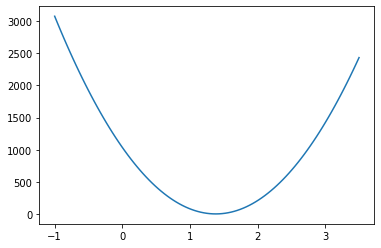

In [63]:
x = np.linspace(-1,3.5,101)
y = 10 * x - 14
z = 21 * x - 29

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, Q(x,y,z))
plt.show()

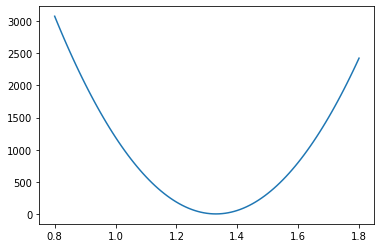

In [71]:
#посмотрим поближе
x = np.linspace(0.8,1.8,101)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, Q(x,y,z))
plt.show()

**Значение х, минимизирующее функцию лежит в интервале (1, 1.6)**<br>
Найдем значение х поточнее: производная функции Q в точке минимума = 0<br>
Выразим Q от х: x^2 + (10x - 14)^2 + (21x - 29)^2 = 542 * x^2 - 1498 * x + 1037<br>
Производная: 1084 * x - 1498 = 0<br>
x = 1498/1084<br>
x = 1.3819<br>
а значит y = 10 * 1.3819 - 14 = -0.181<br>
z = 21 * 1.3819 - 29 = 0.0199

**Ответ**<br>
1.3819, -0.181, 0.0199

**Проверим**

In [72]:
x, res, rank, s = np.linalg.lstsq(a,b.T, rcond=None)
display(x, res, rank, s)

array([[ 1.38191882],
       [-0.18081181],
       [ 0.0202952 ]])

array([], dtype=float64)

2

array([9.65316119, 2.41173777])

### 6 Найдите одно из псевдорешений вырожденной системы. Попробуйте также отыскать и нормальное псевдорешение.
![](Screenshot_7_2_6.png)

In [114]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[2,5,11]])

#посчитаем определитель матрицы и ранги
print(np.linalg.det(a))
c = np.concatenate((a,b.T), axis=1)
print(np.linalg.matrix_rank(a), np.linalg.matrix_rank(c))

-9.51619735392994e-16
2 3


#### Через QR разложение

In [115]:
#найдем QR разложение
q, r = np.linalg.qr(a)

#проверим
display(q,r, np.dot(q,r))

array([[-0.12309149,  0.90453403,  0.40824829],
       [-0.49236596,  0.30151134, -0.81649658],
       [-0.86164044, -0.30151134,  0.40824829]])

array([[-8.12403840e+00, -9.60113630e+00, -1.10782342e+01],
       [ 0.00000000e+00,  9.04534034e-01,  1.80906807e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.11164740e-15]])

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [116]:
#найдем решение для случая Х2 = 0
r1 = r[:2, :2]
b1 = np.dot(q.T, b.T)[:2]

display(r1, b1)

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

array([[-1.21860576e+01],
       [ 8.54871729e-15]])

In [117]:
x1 = np.linalg.solve(r1,b1)

#запишем псевдорешение х
x = np.append(x1, 0)
display(x1, np.round(x,2))

array([[1.50000000e+00],
       [9.45096256e-15]])

array([1.5, 0. , 0. ])

In [121]:
#проверим, подставив х
display(x, np.dot(a, x), np.linalg.norm(x), np.linalg.norm(np.dot(a, x) - b))

array([1.50000000e+00, 9.45096256e-15, 0.00000000e+00])

array([ 1.5,  6. , 10.5])

1.4999999999999893

1.2247448713915885

**Ответ**<br>
x = [1.5, 0, 0]

#### Нормальное псевдорешение через минимизацию функции

In [122]:
def Q(x,y,z):
    return (x**2 + y**2 + z**2)

Выразим y и z через х.
* Вычтем из третьего уравнения первое, умноженное на 3: 2х + 2y = 5; y = 2.5 - 2x
* Вычтем из третьего уравнения первое, умноженное на 4: 3x - 3z = 3; z = x-1

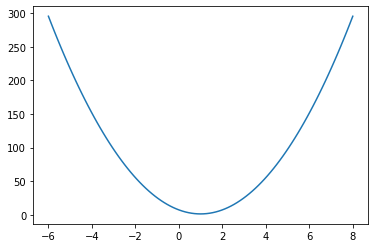

In [123]:
x = np.linspace(-6,8,101)
y = -2 * x + 2.5
z = x - 1

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, Q(x,y,z))
plt.show()

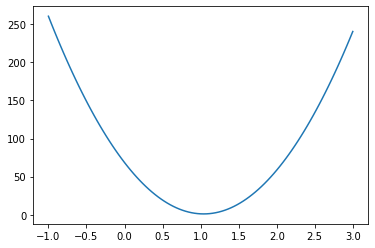

In [124]:
#посмотрим поближе
x = np.linspace(-1,3,101)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, Q(x,y,z))
plt.show()

**Значение х, минимизирующее функцию лежит в интервале (0, 2)**<br>

**Посмотрим решение через встроенные метод наименьших квадратов**

In [127]:
x, res, rank, s = np.linalg.lstsq(a,b.T, rcond=None)
display(x, np.dot(a, x), np.linalg.norm(x), np.linalg.norm(np.dot(a, x) - b.T))

array([[ 1.25],
       [ 0.5 ],
       [-0.25]])

array([[ 1.5],
       [ 6. ],
       [10.5]])

1.3693063937629126

1.224744871391589